In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
X, y = fetch_california_housing(return_X_y=True)

**1. Create train and test sets**

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123, train_size=0.8)

**2. Train a model**

In [6]:
from sklearn.linear_model import LinearRegression # Choose the hypothesis space

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(X_train, y_train);  # Solves evaluation + optimization

In [9]:
lr.coef_

array([ 4.39988248e-01,  9.15770358e-03, -1.11827735e-01,  6.47857908e-01,
       -6.55068105e-06, -3.92330215e-03, -4.17033805e-01, -4.27676550e-01])

In [10]:
lr.intercept_

-36.255619398985175

**3. Predict**

In [11]:
y_pred = lr.predict(X_test) # Coefficients * X_test + intercept_

In [12]:
1-sum((y_pred-y_test)**2)/sum((y_test-np.mean(y_test))**2) # R^2

0.610454689479789

In [13]:
lr.score(X_test, y_test)

0.6104546894797871

In [14]:
from sklearn.metrics import mean_squared_error  # Use different metrics

In [15]:
mean_squared_error(y_true=y_test, y_pred=y_pred)

0.5180228655178681

**4. Assume we are happy with this model...**

In [16]:
lr.fit(X,y) # final model, trained on everything

LinearRegression()

In [17]:
import pickle

In [18]:
pickle.dump(lr, open('first_model.pkl', 'wb')) 

In [19]:
lr.coef_

array([ 4.36693293e-01,  9.43577803e-03, -1.07322041e-01,  6.45065694e-01,
       -3.97638942e-06, -3.78654265e-03, -4.21314378e-01, -4.34513755e-01])

In [20]:
lr2 = LinearRegression()

In [21]:
lr2.coef_ = lr.coef_

In [22]:
lr2.coef_

array([ 4.36693293e-01,  9.43577803e-03, -1.07322041e-01,  6.45065694e-01,
       -3.97638942e-06, -3.78654265e-03, -4.21314378e-01, -4.34513755e-01])

# Preprocessing

In [23]:
X_train[0,:]

array([   4.5694    ,   28.        ,    6.2195122 ,    1.0304878 ,
        504.        ,    3.07317073,   38.38      , -122.33      ])

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [25]:
scl = StandardScaler()

In [26]:
X_train_scl = scl.fit_transform(X_train)

In [27]:
# Train model as before... 
lr.fit(X_train_scl, y_train)

LinearRegression()

Transformation needs to be applied to `X_test`.

In [28]:
X_test_scl = scl.transform(X_test)

In [29]:
lr.score(X_test_scl, y_test)

0.6104546894797875

## Pipelines

In [30]:
from sklearn.pipeline import make_pipeline

In [31]:
pipe = make_pipeline(StandardScaler(), LinearRegression())

In [32]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [33]:
y_pred = pipe.predict(X_test)

In [34]:
pipe.score(X_test,y_test)

0.6104546894797875

## A visual sanity check - Parity plot

In [35]:
minval = min(min(y_pred), min(y_test))
maxval = max(max(y_pred), max(y_test))

In [36]:
mesh = np.linspace(minval, maxval, 100)

Text(0.5, 1.0, 'Parity plot')

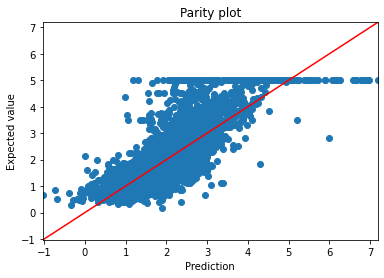

In [37]:
plt.scatter(y_pred, y_test)
plt.xlim(minval, maxval)
plt.xlabel('Prediction')
plt.ylim(minval, maxval)
plt.ylabel('Expected value')
plt.plot(mesh, mesh, 'r')
plt.title('Parity plot')

## Learning curve

In [38]:
from sklearn.model_selection import learning_curve

In [39]:
train_sizes, train_scores, test_scores = learning_curve(lr, X_train, y_train, cv=5)

In [40]:
train_scores

array([[0.64774809, 0.65403765, 0.65403765, 0.65403765, 0.65403765],
       [0.61051661, 0.64050985, 0.64097057, 0.64097057, 0.64097057],
       [0.61479891, 0.632658  , 0.61436711, 0.61170206, 0.61170206],
       [0.61260196, 0.63130429, 0.61082525, 0.61405387, 0.61524319],
       [0.60479833, 0.6038217 , 0.60337977, 0.60615007, 0.61324328]])

In [41]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_mean

array([0.65277974, 0.63478764, 0.61704563, 0.61680571, 0.60627863])

In [42]:
train_sizes

array([ 1320,  4292,  7264, 10236, 13209])

In [43]:
test_scores_mean = np.mean(test_scores, axis=1)

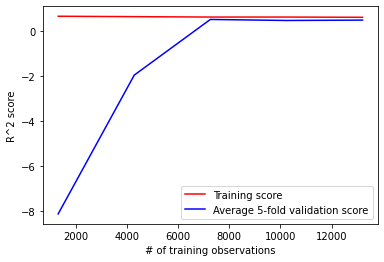

In [44]:
plt.plot(train_sizes, train_scores_mean, label='Training score', color='r') # Training score
plt.plot(train_sizes, test_scores_mean, label='Average 5-fold validation score', color='b') # Test score
plt.xlabel('# of training observations')
plt.ylabel('R^2 score')
plt.legend(loc='best')

## Add polynomial features

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
polynomial_pipe = make_pipeline(PolynomialFeatures(degree=2), MinMaxScaler(), LinearRegression())

In [47]:
polynomial_pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression())])

In [48]:
polynomial_pipe.score(X_test, y_test)

0.6028532846882477

In [49]:
train_sizes, train_scores, test_scores = learning_curve(polynomial_pipe, X_train, y_train, cv=5)

In [50]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

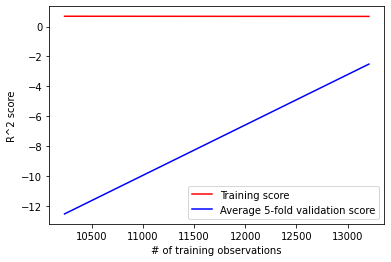

In [51]:
plt.plot(train_sizes[3:], train_scores_mean[3:], label='Training score', color='r') # Training score
plt.plot(train_sizes[3:], test_scores_mean[3:], label='Average 5-fold validation score', color='b') # Test score
plt.xlabel('# of training observations')
plt.ylabel('R^2 score')
plt.legend(loc='best')

In [52]:
X_train_pol = PolynomialFeatures().fit_transform(X_train)

In [53]:
X_train_pol.shape

(16512, 45)

In [54]:
test_scores

array([[-5.74515691e-01, -1.46391070e+02,  5.14754507e-01,
         5.14198757e-01, -1.98580008e+05],
       [ 4.48338298e-01, -3.94736001e+02,  5.38981442e-01,
         6.72854058e-01, -1.62401471e+05],
       [ 6.62118601e-01, -4.75356910e+01,  6.81406585e-01,
         6.46157832e-01, -1.76320588e+01],
       [ 6.12698070e-01, -4.88918046e+01,  6.79676921e-01,
         6.52292700e-01, -1.58118567e+01],
       [ 6.35211880e-01,  5.12460473e-01,  6.73521714e-01,
         6.65225010e-01, -1.50477016e+01]])

In [55]:
y_pred = polynomial_pipe.predict(X_test)

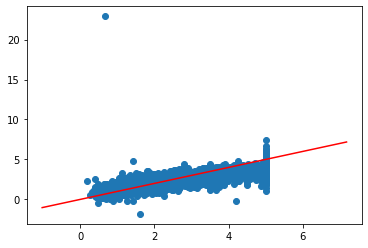

In [56]:
plt.scatter(y_test, y_pred)
plt.plot(mesh, mesh, 'r')